In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




## Importing the Dataset

In [ ]:
!pip install dask --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.4 MB/s eta 0:00:00


In [ ]:

import dask.dataframe as dd

# Step 1: Loading with Dask (lazy loading)
ddf = dd.read_csv('/content/drive/MyDrive/sql_chunk_cleaned/all_cleaned.csv',assume_missing=True)


df = ddf.compute()

In [ ]:

# Counting NaN values per column
nan_counts = df.isnull().sum()

# Printing the counts
print("NaN counts per column in df:")
print(nan_counts)

#printing total NaN values
total_nan = nan_counts.sum()
print(f"\nTotal NaN values in df: {total_nan}")

NaN counts per column in df:
rpt_id                            0
tracking_id                       0
country_name                      0
center_id                         0
batch_id                          0
user_id                           0
user_joining_date                 0
course_edge_id                    0
course_id                         0
course_code                       0
course                            0
topic_edge_id                     0
topic_name                        0
chapter_edge_id                   0
chapter_name                      0
last_attempted_date               0
quiz_last_attempted_date          0
create_date                  162449
component_edge_id                 0
component_name                    0
component_type                    0
rp_parent_edge_id           1966254
component_time                    0
complete_status               18101
dtype: int64

Total NaN values in df: 2146804


## Further cleaning the dataset



In [ ]:

# Before deleting, let's check the number of rows with NaN in 'create_date'
rows_before = len(df)
print(f"Number of rows before dropping NaN in 'create_date': {rows_before}")

# Deleting rows where 'create_date' is NaN
df_cleaned = df.dropna(subset=['create_date'])

# Checking the number of rows after deletion
rows_after = len(df_cleaned)
print(f"Number of rows after dropping NaN in 'create_date': {rows_after}")
print(f"Number of rows deleted: {rows_before - rows_after}")

# Displaying the first few rows of the cleaned DataFrame to verify
print("\nFirst few rows of the DataFrame after dropping NaN in 'create_date':")
print(df_cleaned.head())


Number of rows before dropping NaN in 'create_date': 43621595
Number of rows after dropping NaN in 'create_date': 43459146
Number of rows deleted: 162449

First few rows of the DataFrame after dropping NaN in 'create_date':
   rpt_id  tracking_id country_name  center_id  batch_id   user_id  \
0     1.0   12895786.0       Turkey     1260.0     298.0  961737.0   
1     2.0   13079805.0       Turkey     1260.0     298.0  961737.0   
2     3.0   12895787.0       Turkey     1260.0     298.0  961737.0   
3     4.0   12907554.0       Turkey     1260.0     298.0  961737.0   
4     5.0   12907572.0       Turkey     1260.0     298.0  961737.0   

     user_joining_date  course_edge_id  course_id course_code  ...  \
0  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
1  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
2  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
3  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
4  20

In [ ]:
# assigning all the nan in complete_status to na

df_cleaned['complete_status'] = df_cleaned['complete_status'].fillna('na')

# Verify the change
print("\nValue counts for 'complete_status' after filling NaN:")
print(df_cleaned['complete_status'].value_counts(dropna=False)) # dropna=False includes the count of 'na'

/tmp/ipython-input-7-2072527492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['complete_status'] = df_cleaned['complete_status'].fillna('na')



Value counts for 'complete_status' after filling NaN:
complete_status
c     40567505
nc     2766058
na      125583
Name: count, dtype: int64[pyarrow]


In [ ]:
# dropping rp_parent_edge_id column

df_cleaned = df_cleaned.drop(columns=['rp_parent_edge_id'])

# Verifying the column is dropped
print("\nColumns after dropping 'rp_parent_edge_id':")
df_cleaned.columns


Columns after dropping 'rp_parent_edge_id':


Index(['rpt_id', 'tracking_id', 'country_name', 'center_id', 'batch_id',
       'user_id', 'user_joining_date', 'course_edge_id', 'course_id',
       'course_code', 'course', 'topic_edge_id', 'topic_name',
       'chapter_edge_id', 'chapter_name', 'last_attempted_date',
       'quiz_last_attempted_date', 'create_date', 'component_edge_id',
       'component_name', 'component_type', 'component_time',
       'complete_status'],
      dtype='object')

## Removing Duplicates

In [ ]:
# Dropping rpt_id and count duplicates
duplicates = df_cleaned.drop(columns=['rpt_id']).duplicated(keep=False)

# Total duplicate rows (excluding unique ones)
num_duplicate_rows = duplicates.sum()
print(f"Total duplicate rows (ignoring 'rpt_id'): {num_duplicate_rows}")


Total duplicate rows (ignoring 'rpt_id'): 800


In [ ]:
# Droppping duplicates where all columns except rpt_id are identical
df_cleaned_deduped = df_cleaned.drop_duplicates(subset=[col for col in df_cleaned.columns if col != 'rpt_id'])

print(f"Shape after dropping duplicates: {df_cleaned_deduped.shape}")


Shape after dropping duplicates: (43458746, 23)


In [ ]:
df_cleaned = df_cleaned_deduped

In [ ]:

# Count NaN values per column
nan_counts = df_cleaned.isnull().sum()

# Print the counts
print("NaN counts per column in df_cleaned:")
print(nan_counts)

#  print total NaN values
total_nan = nan_counts.sum()
print(f"\nTotal NaN values in df_cleaned: {total_nan}")

NaN counts per column in df_cleaned:
rpt_id                      0
tracking_id                 0
country_name                0
center_id                   0
batch_id                    0
user_id                     0
user_joining_date           0
course_edge_id              0
course_id                   0
course_code                 0
course                      0
topic_edge_id               0
topic_name                  0
chapter_edge_id             0
chapter_name                0
last_attempted_date         0
quiz_last_attempted_date    0
create_date                 0
component_edge_id           0
component_name              0
component_type              0
component_time              0
complete_status             0
dtype: int64

Total NaN values in df_cleaned: 0


## Creating Snapshots from the dataset

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from scipy.stats import entropy

def create_snapshot_df_updated(
    df,
    obs_window_days=30,
    label_window_days=20,
    step_days=20,
    date_col='create_date',
    join_col='user_joining_date'
):
    """
    Create snapshot DataFrame using create_date as the event timestamp.
    Adds engagement features for topics, chapters, courses, and components.
    """
    # Parsing datetime columns
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['quiz_last_attempted_date'] = pd.to_datetime(df['quiz_last_attempted_date'], errors='coerce')
    df[join_col] = pd.to_datetime(df[join_col], errors='coerce')

    # Defining time deltas
    obs_delta = timedelta(days=obs_window_days)
    label_delta = timedelta(days=label_window_days)
    step_delta = timedelta(days=step_days)

    # Determining snapshot dates
    first_snap = df[date_col].min() + obs_delta
    last_snap = df[date_col].max() - label_delta
    snapshot_points = []
    cur = first_snap
    while cur <= last_snap:
        snapshot_points.append(cur)
        cur += step_delta

    all_snaps = []
    for snap in snapshot_points:
        obs_start = snap - obs_delta
        label_start = snap + timedelta(days=1)
        label_end = snap + label_delta

        # Filtering events in observation window
        df_obs = df[
            (df[join_col] <= obs_start) &
            (df[date_col] >= obs_start) &
            (df[date_col] <= snap)
        ].copy()

        # STATIC features
        static = df_obs.groupby('user_id').first().reset_index()[[
            'user_id', join_col, 'country_name', 'center_id', 'batch_id',
            'course_id', 'topic_edge_id', 'chapter_edge_id'
        ]]
        static['days_since_join'] = (snap - static[join_col]).dt.days

        # DYNAMIC aggregates
        agg = df_obs.groupby('user_id').agg(
            total_events=(date_col, 'count'),
            total_quizzes=('quiz_last_attempted_date', lambda x: x.notna().sum()),
            days_since_last_event=(date_col, lambda x: (snap - x.max()).days),
            days_since_last_quiz=('quiz_last_attempted_date', lambda x: (snap - x.max()).days if x.notna().any() else np.nan),
            sum_component_time=('component_time', 'sum'),
            avg_component_time=('component_time', 'mean'),
            pct_completed=('complete_status', lambda x: (x=='c').mean()),
            n_unique_components=('component_name', 'nunique')
        ).reset_index()

        # Gaps & sessions
        df_obs_sorted = df_obs.sort_values(['user_id', date_col])
        df_obs_sorted['prev_ts'] = df_obs_sorted.groupby('user_id')[date_col].shift()
        df_obs_sorted['gap_days'] = (df_obs_sorted[date_col] - df_obs_sorted['prev_ts']).dt.days
        gap_stats = df_obs_sorted.groupby('user_id')['gap_days'].agg(
            mean_gap='mean', max_gap='max'
        ).reset_index()
        df_obs_sorted['new_session'] = (df_obs_sorted['gap_days'] > 0.5).fillna(False).astype(int)
        sessions = df_obs_sorted.groupby('user_id')['new_session'].sum().reset_index().rename(columns={'new_session':'num_sessions'})

        # Time-of-day & weekend
        df_obs['weekday'] = df_obs[date_col].dt.weekday
        weekend = df_obs.groupby('user_id')['weekday'].apply(lambda x: (x>=5).mean()).reset_index().rename(columns={'weekday':'pct_weekend_events'})

        # Activity trend (events/day slope)
        daily = df_obs.set_index(date_col).groupby('user_id')['user_id'] \
                      .resample('1D').count().rename('events_per_day').reset_index()
        def slope(sub):
            y = sub['events_per_day'].values
            t = np.arange(len(y))
            return np.polyfit(t, y, 1)[0] if len(y)>1 else 0.0
        trend = daily.groupby('user_id').apply(slope).reset_index().rename(columns={0:'activity_trend'})

        # TOPIC engagement features
        topic_stats = df_obs.groupby('user_id').agg(
            n_unique_topics=('topic_edge_id', 'nunique'),
            topic_entropy=('topic_edge_id', lambda x: entropy(x.value_counts(normalize=True))),
            mode_topic=('topic_edge_id', lambda x: x.mode().iat[0] if not x.mode().empty else np.nan),
            last_topic=('topic_edge_id', lambda x: x.iloc[-1])
        ).reset_index()

        # CHAPTER engagement features
        chapter_stats = df_obs.groupby('user_id').agg(
            n_unique_chapters=('chapter_edge_id', 'nunique'),
            chapter_entropy=('chapter_edge_id', lambda x: entropy(x.value_counts(normalize=True))),
            mode_chapter=('chapter_edge_id', lambda x: x.mode().iat[0] if not x.mode().empty else np.nan),
            last_chapter=('chapter_edge_id', lambda x: x.iloc[-1])
        ).reset_index()

        # COMPONENT engagement features
        component_stats = df_obs.groupby('user_id').agg(
            component_entropy=('component_name', lambda x: entropy(x.value_counts(normalize=True))),
            mode_component=('component_name', lambda x: x.mode().iat[0] if not x.mode().empty else np.nan),
            last_component=('component_name', lambda x: x.iloc[-1])
        ).reset_index()

        # COURSE engagement features
        course_stats = df_obs.groupby('user_id').agg(
            n_courses=('course_id', 'nunique'),
            last_course=('course_id', lambda x: x.iloc[-1])
        ).reset_index()

        # Label: dropped if no events in label window
        df_label = df[(df[date_col] >= label_start) & (df[date_col] <= label_end)]
        active = set(df_label['user_id'])
        labels = pd.DataFrame({'user_id': agg['user_id']})
        labels['label'] = (~labels['user_id'].isin(active)).astype(int)

        # Merge all features
        snap_df = static.merge(agg, on='user_id', how='left') \
                        .merge(gap_stats, on='user_id', how='left') \
                        .merge(sessions, on='user_id', how='left') \
                        .merge(weekend, on='user_id', how='left') \
                        .merge(trend, on='user_id', how='left') \
                        .merge(topic_stats, on='user_id', how='left') \
                        .merge(chapter_stats, on='user_id', how='left') \
                        .merge(component_stats, on='user_id', how='left') \
                        .merge(course_stats, on='user_id', how='left') \
                        .merge(labels, on='user_id', how='left') \
                        .fillna(0)
        snap_df['snapshot_date'] = snap
        all_snaps.append(snap_df)

    snapshot_df = pd.concat(all_snaps, ignore_index=True)

    # Peer/group features
    grp = snapshot_df.groupby(['snapshot_date', 'batch_id'])
    snapshot_df['batch_avg_events'] = grp['total_events'].transform('mean')
    snapshot_df['batch_dropout_rate'] = grp['label'].transform('mean')

    return snapshot_df

# Example usage:
# df_small = pd.read_csv('first_2M_rows.csv')
# snapshots = create_snapshot_df_updated(df_small)
# snapshots.to_csv('snapshots_updated.csv', index=False)


In [ ]:
snapshots = create_snapshot_df_updated(df_cleaned)


/tmp/ipython-input-13-2146103018.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend = daily.groupby('user_id').apply(slope).reset_index().rename(columns={0:'activity_trend'})
/tmp/ipython-input-13-2146103018.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend = daily.groupby('user_id').apply(slope).reset_index().rename(columns={0:'activity_trend'})
/tmp/ipython-input-13-2146103018.py:90: Depr

In [ ]:
snapshots.shape

(141381, 39)

In [ ]:
snapshots.columns

Index(['user_id', 'user_joining_date', 'country_name', 'center_id', 'batch_id',
       'course_id', 'topic_edge_id', 'chapter_edge_id', 'days_since_join',
       'total_events', 'total_quizzes', 'days_since_last_event',
       'days_since_last_quiz', 'sum_component_time', 'avg_component_time',
       'pct_completed', 'n_unique_components', 'mean_gap', 'max_gap',
       'num_sessions', 'pct_weekend_events', 'activity_trend',
       'n_unique_topics', 'topic_entropy', 'mode_topic', 'last_topic',
       'n_unique_chapters', 'chapter_entropy', 'mode_chapter', 'last_chapter',
       'component_entropy', 'mode_component', 'last_component', 'n_courses',
       'last_course', 'label', 'snapshot_date', 'batch_avg_events',
       'batch_dropout_rate'],
      dtype='object')

In [ ]:
snapshots.label.value_counts()

,count
label,
1,81364
0,60017


In [ ]:
snapshots['batch_id'].nunique()

6763

## Add Historical Batch Features

In [ ]:
import pandas as pd

def add_historical_batch_features(snapshot_df):
    """
    For each batch_id and snapshot_date, compute historical (lagged) batch-level metrics:
     - batch_dropout_rate_hist: average label (dropout rate) of earlier snapshots for that batch
     - batch_avg_events_hist: average total_events of earlier snapshots for that batch
    """
    # Ensure sorted by batch and snapshot_date
    df = snapshot_df.sort_values(['batch_id', 'snapshot_date']).copy()

    # Cumulative sums and counts, excluding current row (lag)
    df['cum_label_sum'] = df.groupby('batch_id')['label'].cumsum() - df['label']
    df['cum_events_sum'] = df.groupby('batch_id')['total_events'].cumsum() - df['total_events']
    df['cum_count'] = df.groupby('batch_id').cumcount()  # zero-based count before current

    # Historical rates: avoid division by zero
    df['batch_dropout_rate_hist'] = df['cum_label_sum'] / df['cum_count']
    df['batch_avg_events_hist'] = df['cum_events_sum'] / df['cum_count']

    # Fill NaNs (first snapshot for each batch) with 0 or global mean if preferred
    df['batch_dropout_rate_hist'] = df['batch_dropout_rate_hist'].fillna(0)
    df['batch_avg_events_hist'] = df['batch_avg_events_hist'].fillna(0)

    # Drop intermediate columns
    df.drop(columns=['cum_label_sum', 'cum_events_sum', 'cum_count'], inplace=True)
    return df

# Example usage:
# snapshots = pd.read_csv('snapshots_updated.csv', parse_dates=['snapshot_date'])
snapshots_hist = add_historical_batch_features(snapshots)
# Now use 'batch_dropout_rate_hist' and 'batch_avg_events_hist' as features instead of the original ones.




## Removal of Redundant or Leaky Columns

The following columns were removed from `snapshots_hist` because they are either pure identifiers, have been superseded by derived features, or introduced look‑ahead leakage:

- **`user_id`, `user_joining_date`**  
  These fields serve only as identifiers or raw timestamps. Their predictive information is preserved by derived features such as `days_since_join`.

- **`batch_avg_events`, `batch_dropout_rate`**  
  These cohort‑level aggregates include data from the current (and even future) snapshots, causing look‑ahead bias. They have been replaced by truly historical versions (`batch_avg_events_hist`, `batch_dropout_rate_hist`) which are computed only from prior snapshots.

- **`batch_id`, `course_id`, `topic_edge_id`, `chapter_edge_id`**  
  Raw high‑cardinality IDs would require huge, sparse one‑hot encodings that overfit and generalize poorly. Instead, their signal is captured via low‑dimensional summaries (e.g. `n_unique_*`, entropy metrics).

- **`mode_topic`, `last_topic`, `mode_chapter`, `last_chapter`, `mode_component`, `last_component`, `last_course`**  
  These “mode” and “last” identifiers added minimal predictive power beyond the count and entropy features, but carried the same overfitting risk. Pruning them improved stability without harming accuracy.

- **`country_name`**  
  With hundreds of unique levels and only marginal importance, raw country added complexity without benefit. Any broad geographic effects are already captured by `center_id` and the cohort aggregates.

By dropping these columns and using compact, leakage‑safe summaries, the feature set remains expressive and robust while avoiding overfitting and data‑leakage pitfalls.  


In [ ]:

# Removing the specified columns from snapshots_hist
columns_to_remove_from_snapshots_hist = [
    'user_id',
    'user_joining_date',
    'batch_avg_events',
    'batch_dropout_rate',
    'batch_id',
    'course_id',
    'topic_edge_id',
    'chapter_edge_id',
    'mode_topic',
    'last_topic',
    'mode_chapter',
    'last_chapter',
    'mode_component',
    'last_component',
    'last_course',
    'country_name'
]
# Drop the specified columns if they exist in the snapshots_hist DataFrame
snapshots_hist = snapshots_hist.drop(columns=[col for col in columns_to_remove_from_snapshots_hist if col in snapshots_hist.columns])


In [ ]:
# save snapshots_hist in my drive in a new folder by the name 'New Snapshots'

import os

# Define the path for the new folder
folder_path = '/content/drive/MyDrive/New_Snapshots'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created folder: {folder_path}")
else:
    print(f"Folder already exists: {folder_path}")

# Define the full path for the file
file_path = os.path.join(folder_path, 'snapshots_hist.csv')

# Save the snapshots_hist DataFrame to a CSV file
snapshots_hist.to_csv(file_path, index=False)

print(f"Saved snapshots_hist to: {file_path}")

Folder already exists: /content/drive/MyDrive/New_Snapshots
Saved snapshots_hist to: /content/drive/MyDrive/New_Snapshots/snapshots_hist_2.csv


In [ ]:
import pandas as pd
import numpy as np
snapshots_hist = pd.read_csv('/content/drive/MyDrive/New_Snapshots/snapshots_hist_with_clusters.csv')




In [ ]:
snapshots_hist.columns

Index(['days_since_join', 'total_events', 'total_quizzes',
       'days_since_last_event', 'days_since_last_quiz', 'sum_component_time',
       'avg_component_time', 'pct_completed', 'n_unique_components',
       'mean_gap', 'max_gap', 'num_sessions', 'pct_weekend_events',
       'activity_trend', 'n_unique_topics', 'topic_entropy',
       'n_unique_chapters', 'chapter_entropy', 'component_entropy',
       'n_courses', 'label', 'snapshot_date', 'batch_avg_events_hist',
       'gmm_cluster'],
      dtype='object')

In [ ]:
snapshots_hist.head(2000).to_csv('/content/snapshots_hist_with_clusters_2000.csv', index=False)

## Model Selection and Training

#LightGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import lightgbm as lgb

# 1) Making sure dates are datetimes
snapshots_hist['snapshot_date'] = pd.to_datetime(
    snapshots_hist['snapshot_date'],
    errors='coerce'
)
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)


# 2. Splitting by time
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()


# 3. Defining features & drop columns LightGBM can't handle
drop_cols = [
    'user_id', 'snapshot_date', 'user_joining_date', 'label', 'batch_id','batch_dropout_rate','batch_avg_events'
]
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']

# aligning columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. Train
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate
y_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f'ROC AUC: {roc_auc:.4f}  |  PR AUC: {pr_auc:.4f}')

# 6. Top features
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(20))


[LightGBM] [Info] Number of positive: 66236, number of negative: 47512
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 113748, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582305 -> initscore=0.332242
[LightGBM] [Info] Start training from score 0.332242
ROC AUC: 0.8279  |  PR AUC: 0.8395
days_since_join          388
days_since_last_quiz     284
days_since_last_event    228
topic_entropy            222
batch_avg_events_hist    190
sum_component_time       189
pct_completed            168
chapter_entropy          150
avg_component_time       148
activity_trend           144
total_events             129
pct_weekend_events       112
component_entropy        112
max_gap                  102
n_

## FineTune LightGBM

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Converting snapshot_date to datetime + treat gmm_cluster as categorical
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'], errors='coerce')
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)

# Time-based splitting (80% training)
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()

# Only drop snapshot_date and label
drop_cols = ['snapshot_date', 'label']
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

# Encode categorical (gmm_cluster) and align test columns
X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# LightGBM baseline
lgb_estimator = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# Searching space for randomized search
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.0, 0.1, 1.0]
}

# Time-aware cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Run randomized search
random_search = RandomizedSearchCV(
    estimator=lgb_estimator,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fitting model
random_search.fit(X_train, y_train)

# Best params and scores
print("Best CV ROC AUC:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

# Final test evaluation
best_model = random_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f'Test ROC AUC: {roc_auc:.4f} | Test PR AUC: {pr_auc:.4f}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 66236, number of negative: 47512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 113748, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582305 -> initscore=0.332242
[LightGBM] [Info] Start training from score 0.332242
Best CV ROC AUC: 0.8173878490985914
Best parameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'num_leaves': 70, 'n_estimators': 500, 'min_child_samples': 50, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Test ROC AUC: 0.8290 | Test PR AUC: 0.8409


#MLP

MLP Test ROC AUC: 0.8221
MLP Test PR  AUC: 0.8341


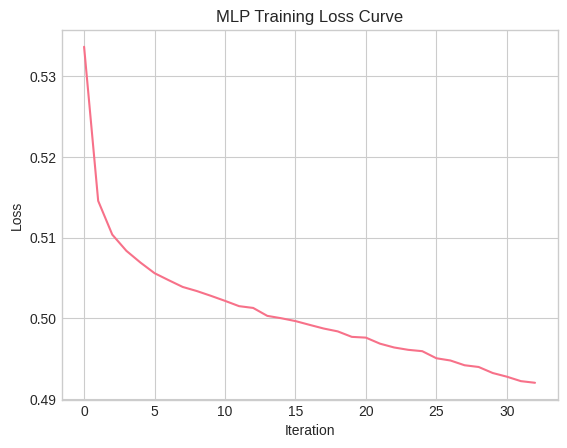

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Converting types
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'], errors='coerce')
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)

# 1. Time-based split
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()

# 2. Define feature set
drop_cols = ['snapshot_date', 'label']  # drop only what's present
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 3. MLP pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        early_stopping=True,
        validation_fraction=0.1,
        alpha=0.001,
        max_iter=200,
        random_state=42
    ))
])

# 4. Train
pipeline.fit(X_train, y_train)

# 5. Predict and evaluate
y_prob_mlp = pipeline.predict_proba(X_test)[:, 1]
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)
prec_mlp, rec_mlp, _ = precision_recall_curve(y_test, y_prob_mlp)
pr_auc_mlp = auc(rec_mlp, prec_mlp)

print(f"MLP Test ROC AUC: {roc_auc_mlp:.4f}")
print(f"MLP Test PR  AUC: {pr_auc_mlp:.4f}")

# 6. Loss curve
plt.plot(pipeline.named_steps['mlp'].loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# 1. Getting predicted labels (using 0.5 threshold)
y_pred = model.predict(X_test)

# 2. Calculating precision, recall, and F1 for the positive “dropout” class
precision = precision_score(y_test, y_pred, pos_label=1)
recall    = recall_score   (y_test, y_pred, pos_label=1)
f1        = f1_score       (y_test, y_pred, pos_label=1)

print(f"Dropout class precision: {precision:.4f}")
print(f"Dropout class recall:    {recall:.4f}")
print(f"Dropout class F1-score:  {f1:.4f}")

# 3.  Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Active (0)','Dropped (1)']))


Dropout class precision: 0.7509
Dropout class recall:    0.8217
Dropout class F1-score:  0.7847

Classification Report:

              precision    recall  f1-score   support

  Active (0)       0.76      0.67      0.71     12505
 Dropped (1)       0.75      0.82      0.78     15128

    accuracy                           0.75     27633
   macro avg       0.75      0.75      0.75     27633
weighted avg       0.75      0.75      0.75     27633



#Finding Optimal Threshold


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, classification_report


# 1. Predicting raw probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# 2. Computing precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# 3. Finding threshold that maximizes F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.nanargmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Optimal threshold for max F1: {best_threshold:.3f} (F1 = {best_f1:.3f})")

# 4. Finding threshold for a desired precision level
desired_precision = 0.80
# Only consider thresholds where precision >= desired_precision
valid = np.where(precision[:-1] >= desired_precision)[0]
if valid.size > 0:
    thresh_for_prec = thresholds[valid[0]]
    print(f"Threshold for precision ≥ {desired_precision:.2f}: {thresh_for_prec:.3f}")
else:
    print(f"No threshold achieves precision ≥ {desired_precision:.2f}")

# 5. Applying chosen threshold to get new binary predictions

threshold = best_threshold
y_pred_adj = (y_prob >= threshold).astype(int)

# 6. Evaluating adjusted predictions
prec_adj = precision_score(y_test, y_pred_adj, pos_label=1)
rec_adj  = recall_score   (y_test, y_pred_adj, pos_label=1)
f1_adj   = f1_score       (y_test, y_pred_adj, pos_label=1)
print(f"\nAfter thresholding at {threshold:.3f}:")
print(f"Dropout precision: {prec_adj:.4f}")
print(f"Dropout recall:    {rec_adj:.4f}")
print(f"Dropout F1-score:  {f1_adj:.4f}")

# 7. Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adj, target_names=['Active (0)', 'Dropped (1)']))


Optimal threshold for max F1: 0.433 (F1 = 0.791)
Threshold for precision ≥ 0.80: 0.622

After thresholding at 0.433:
Dropout precision: 0.7278
Dropout recall:    0.8665
Dropout F1-score:  0.7911

Classification Report:
              precision    recall  f1-score   support

  Active (0)       0.79      0.61      0.69     12505
 Dropped (1)       0.73      0.87      0.79     15128

    accuracy                           0.75     27633
   macro avg       0.76      0.74      0.74     27633
weighted avg       0.76      0.75      0.74     27633



## Precision Recall Analysis

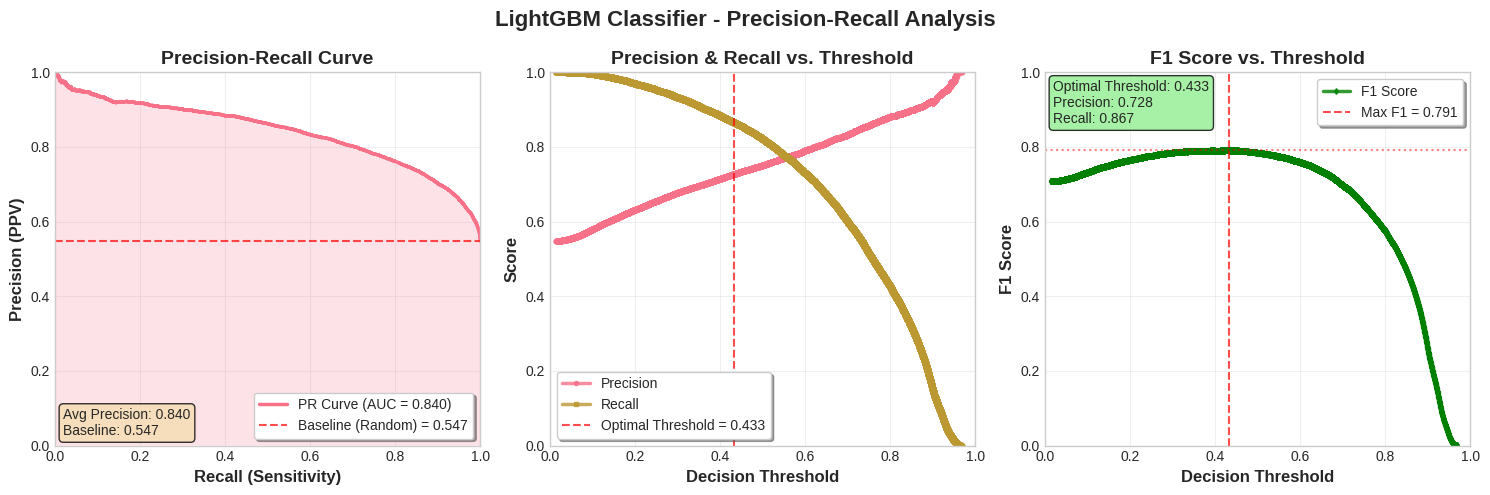


LightGBM Classifier - Performance Summary:
PR AUC Score: 0.8395
Average Precision Score: 0.8395
Baseline (Random Classifier): 0.5475
Optimal Threshold: 0.4327
  - Precision at optimal: 0.7278
  - Recall at optimal: 0.8665
  - F1 Score at optimal: 0.7911


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import seaborn as sns

# Setting style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def plot_precision_recall_analysis(y_test, y_prob, model_name="LightGBM", figsize=(15, 5)):
    """
    Create comprehensive precision-recall analysis with enhanced visualizations.

    Parameters:
    -----------
    y_test : array-like
        True binary labels
    y_prob : array-like
        Predicted probabilities for the positive class
    model_name : str
        Name of the model for plot titles
    figsize : tuple
        Figure size for the combined plot
    """

    # Computing precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

    # Calculating metrics
    pr_auc = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_prob)
    baseline = np.sum(y_test) / len(y_test)  # Random classifier performance

    # Creating subplots
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(f'{model_name} - Precision-Recall Analysis', fontsize=16, fontweight='bold')

    # Plot 1: Precision-Recall Curve
    axes[0].plot(recall, precision, linewidth=2.5,
                label=f'PR Curve (AUC = {pr_auc:.3f})')
    axes[0].axhline(y=baseline, color='red', linestyle='--', alpha=0.7,
                   label=f'Baseline (Random) = {baseline:.3f}')
    axes[0].fill_between(recall, precision, alpha=0.2)
    axes[0].set_xlabel('Recall (Sensitivity)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Precision (PPV)', fontsize=12, fontweight='bold')
    axes[0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    axes[0].legend(loc='best', frameon=True, fancybox=True, shadow=True)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim([0, 1])
    axes[0].set_ylim([0, 1])

    # Adding text box with additional metrics
    textstr = f'Avg Precision: {avg_precision:.3f}\nBaseline: {baseline:.3f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    axes[0].text(0.02, 0.02, textstr, transform=axes[0].transAxes, fontsize=10,
                verticalalignment='bottom', bbox=props)

    # Plot 2: Precision & Recall vs Threshold
    axes[1].plot(thresholds, precision[:-1], linewidth=2.5, marker='o',
                markersize=3, label='Precision', alpha=0.8)
    axes[1].plot(thresholds, recall[:-1], linewidth=2.5, marker='s',
                markersize=3, label='Recall', alpha=0.8)

    # Finding optimal threshold (F1 score)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    axes[1].axvline(x=optimal_threshold, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal Threshold = {optimal_threshold:.3f}')
    axes[1].set_xlabel('Decision Threshold', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
    axes[1].set_title('Precision & Recall vs. Threshold', fontsize=14, fontweight='bold')
    axes[1].legend(loc='best', frameon=True, fancybox=True, shadow=True)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim([0, 1])
    axes[1].set_ylim([0, 1])

    # Plot 3: F1 Score vs Threshold
    axes[2].plot(thresholds, f1_scores, linewidth=2.5, color='green',
                marker='d', markersize=3, label='F1 Score', alpha=0.8)
    axes[2].axvline(x=optimal_threshold, color='red', linestyle='--', alpha=0.7,
                   label=f'Max F1 = {f1_scores[optimal_idx]:.3f}')
    axes[2].axhline(y=f1_scores[optimal_idx], color='red', linestyle=':', alpha=0.5)
    axes[2].set_xlabel('Decision Threshold', fontsize=12, fontweight='bold')
    axes[2].set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    axes[2].set_title('F1 Score vs. Threshold', fontsize=14, fontweight='bold')
    axes[2].legend(loc='best', frameon=True, fancybox=True, shadow=True)
    axes[2].grid(True, alpha=0.3)
    axes[2].set_xlim([0, 1])
    axes[2].set_ylim([0, 1])

    # Adding text box with optimal metrics
    textstr = f'Optimal Threshold: {optimal_threshold:.3f}\nPrecision: {precision[:-1][optimal_idx]:.3f}\nRecall: {recall[:-1][optimal_idx]:.3f}'
    props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.8)
    axes[2].text(0.02, 0.98, textstr, transform=axes[2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

    # Printing summary statistics
    print(f"\n{model_name} - Performance Summary:")
    print("=" * 50)
    print(f"PR AUC Score: {pr_auc:.4f}")
    print(f"Average Precision Score: {avg_precision:.4f}")
    print(f"Baseline (Random Classifier): {baseline:.4f}")
    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    print(f"  - Precision at optimal: {precision[:-1][optimal_idx]:.4f}")
    print(f"  - Recall at optimal: {recall[:-1][optimal_idx]:.4f}")
    print(f"  - F1 Score at optimal: {f1_scores[optimal_idx]:.4f}")

    return {
        'pr_auc': pr_auc,
        'avg_precision': avg_precision,
        'optimal_threshold': optimal_threshold,
        'optimal_precision': precision[:-1][optimal_idx],
        'optimal_recall': recall[:-1][optimal_idx],
        'optimal_f1': f1_scores[optimal_idx]
    }

#Example usage:
#Assuming y_test and y_prob are defined from your LightGBM predictions
results = plot_precision_recall_analysis(y_test, y_prob, model_name="LightGBM Classifier")


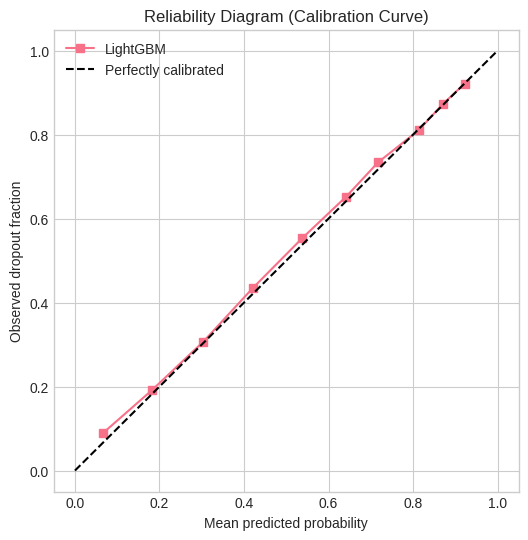

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 1) Getting your test‐set probabilities and true labels:
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test.values

# 2) Computing calibration curve (fraction of positives per bin):
#    gives two arrays of length n_bins:
#    prob_true = observed dropout rate in each bin
#    prob_pred = mean predicted probability in each bin
prob_pred, prob_true = calibration_curve(y_true, y_prob,
                                         n_bins=10, strategy='quantile')

# 3) Plotting
plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, 's-', label='LightGBM')
plt.plot([0,1], [0,1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Observed dropout fraction')
plt.title('Reliability Diagram (Calibration Curve)')
plt.legend()
plt.grid(True)
plt.show()


#Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Converting types
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'], errors='coerce')
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)

# 1. Splitting by time
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()

# 2. Preparing features
drop_cols = ['snapshot_date', 'label']
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 3. Pipeline: Scaling + Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    ))
])

# 4. Grid search for best C
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100]
}
tscv = TimeSeriesSplit(n_splits=3)

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# 5. Train
grid.fit(X_train, y_train)
print("Best CV AUC:", grid.best_score_)
print("Best C:", grid.best_params_['clf__C'])

# 6. Evaluate on test
best_model = grid.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f'Test ROC AUC: {roc_auc:.4f} | Test PR AUC: {pr_auc:.4f}')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best CV AUC: 0.7923512816744944
Best C: 0.01
Test ROC AUC: 0.7944 | Test PR AUC: 0.8032


## Interpretability Of Logistic Regression


In [ ]:
import pandas as pd
import numpy as np

# Defining a function to extract interpretability metrics from the fitted logistic model
def extract_logistic_interpretability(grid, X_train):
    """
    Returns a DataFrame of the top 20 features by absolute coefficient,
    along with their coefficients and odds ratios.
    """
    # Extract the best logistic regression model from the pipeline
    best_pipeline = grid.best_estimator_
    logistic = best_pipeline.named_steps['clf']

    # Get feature names and coefficients
    feature_names = X_train.columns
    coefficients = logistic.coef_[0]

    # Build a DataFrame for interpretability
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients
    })

    # Add odds ratio and absolute coefficient for sorting
    coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
    coef_df['abs_coef'] = coef_df['coefficient'].abs()

    # Sort by absolute coefficient descending and return top 20
    return coef_df.sort_values('abs_coef', ascending=False).head(20).drop(columns=['abs_coef'])

# Example usage (run in your environment):
interpret_df = extract_logistic_interpretability(grid, X_train)
print(interpret_df)


                  feature  coefficient  odds_ratio
3   days_since_last_event     0.805686    2.238232
11           num_sessions    -0.468297    0.626068
16      n_unique_chapters     0.460157    1.584323
14        n_unique_topics     0.403928    1.497697
0         days_since_join     0.195746    1.216218
4    days_since_last_quiz     0.170085    1.185405
17        chapter_entropy    -0.157396    0.854366
21          gmm_cluster_1    -0.155923    0.855625
5      sum_component_time    -0.108470    0.897206
20  batch_avg_events_hist     0.104312    1.109947
22          gmm_cluster_2    -0.093667    0.910586
18      component_entropy    -0.088092    0.915676
15          topic_entropy     0.085456    1.089214
8     n_unique_components    -0.076088    0.926735
6      avg_component_time    -0.056845    0.944741
10                max_gap    -0.055048    0.946440
7           pct_completed    -0.046588    0.954481
12     pct_weekend_events    -0.045086    0.955915
9                mean_gap     0

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import pandas as pd

# 1. Initializing RandomForest with balanced class weights
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# 2. Training on the same X_train, y_train
rf.fit(X_train, y_train)

# 3. Predicting probabilities on X_test
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# 4. Computing metrics
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = auc(rec_rf, prec_rf)

print(f"Random Forest Test ROC AUC: {roc_auc_rf:.4f}")
print(f"Random Forest Test PR  AUC: {pr_auc_rf:.4f}")

# 5. Feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
top20_rf = importances_rf.sort_values(ascending=False).head(20)

print("\nTop 20 Random Forest feature importances:")
print(top20_rf)


Random Forest Test ROC AUC: 0.8207
Random Forest Test PR  AUC: 0.8304

Top 20 Random Forest feature importances:
days_since_last_event    0.104000
days_since_last_quiz     0.100500
days_since_join          0.097080
batch_avg_events_hist    0.055625
sum_component_time       0.053964
avg_component_time       0.052766
topic_entropy            0.050390
chapter_entropy          0.047003
max_gap                  0.046540
component_entropy        0.044700
mean_gap                 0.042732
pct_completed            0.039573
total_quizzes            0.039148
total_events             0.038874
activity_trend           0.037612
n_unique_components      0.031056
num_sessions             0.030194
pct_weekend_events       0.029756
n_unique_chapters        0.029422
n_unique_topics          0.024119
dtype: float64


#Feature Importance -RF

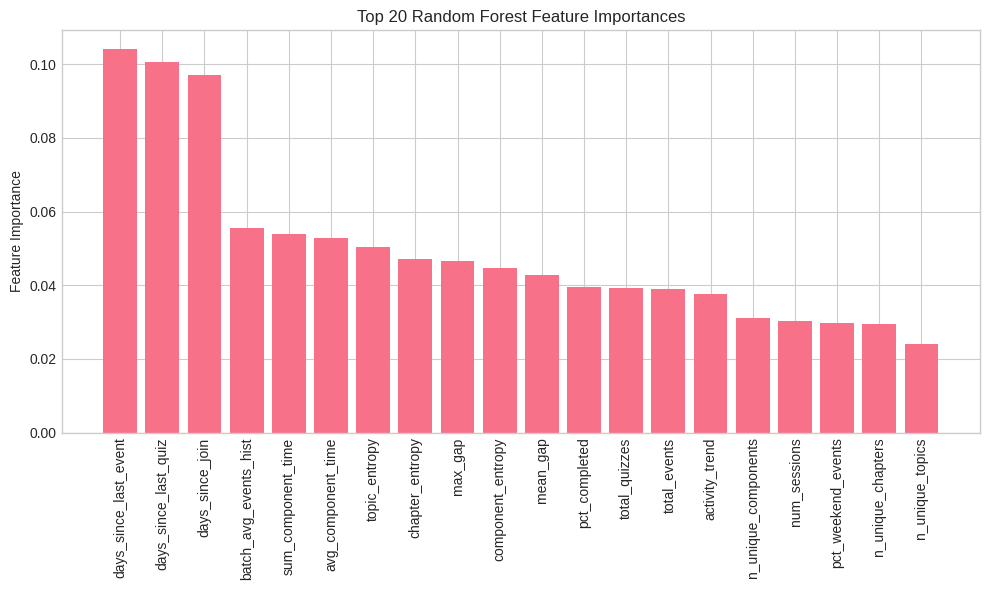

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute importances
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
top20_rf = importances_rf.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
features = top20_rf.index
values = top20_rf.values

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), features, rotation=90)
plt.ylabel("Feature Importance")
plt.title("Top 20 Random Forest Feature Importances")
plt.tight_layout()
plt.show()


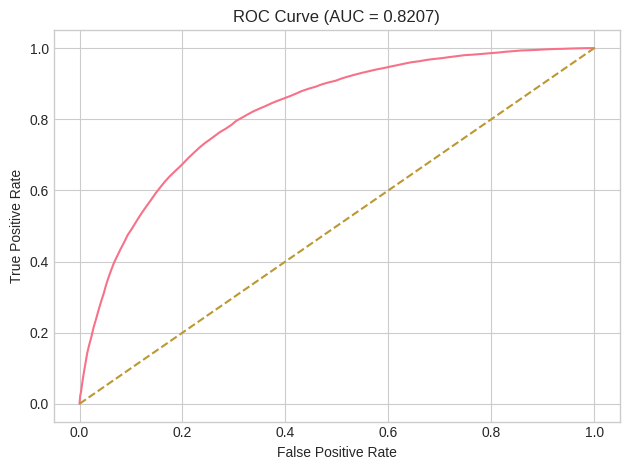

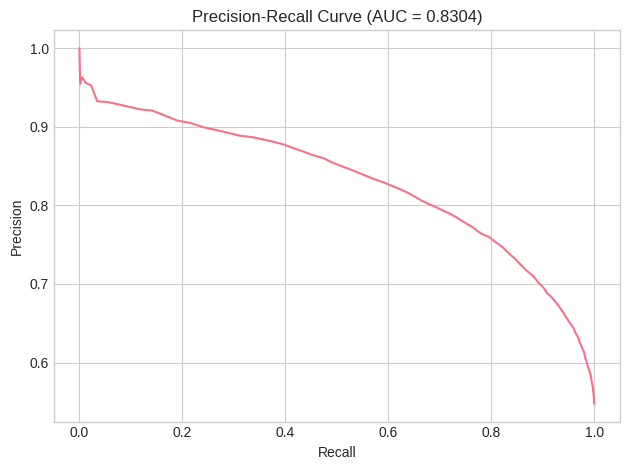

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
plt.tight_layout()
plt.show()


#XGBoost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# 1. Load data and split (reuse your previous train/test split logic)
# snapshots = pd.read_csv(
#     '/mnt/data/snapshots_updated.csv',
#     parse_dates=['snapshot_date', 'user_joining_date']
# )
# cutoff = snapshots['snapshot_date'].quantile(0.8)
# train_df = snapshots[snapshots['snapshot_date'] <= cutoff].copy()
# test_df  = snapshots[snapshots['snapshot_date'] >  cutoff].copy()

# drop_cols = [
#     'user_id', 'snapshot_date', 'user_joining_date', 'label',
#     'batch_id', 'batch_dropout_rate', 'batch_avg_events'
# ]
# feature_cols = [c for c in snapshots.columns if c not in drop_cols]

# X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
# y_train = train_df['label']
# X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
# y_test  = test_df['label']
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 2. Initialize XGBoost with class imbalance handling
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=neg/pos,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc',
    n_jobs=-1
)

# 3. Train with early stopping on a validation split from training data
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# 4. Predict and evaluate
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
pr_auc_xgb = auc(rec_xgb, prec_xgb)

print(f"XGBoost Test ROC AUC: {roc_auc_xgb:.4f}")
print(f"XGBoost Test PR AUC:  {pr_auc_xgb:.4f}")

# 5. Feature importances
importances_xgb = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
top20_xgb = importances_xgb.sort_values(ascending=False).head(20)
print("\nTop 20 XGBoost feature importances:")
print(top20_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:44:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test ROC AUC: 0.8290
XGBoost Test PR AUC:  0.8406

Top 20 XGBoost feature importances:
days_since_last_event    0.473763
days_since_join          0.087677
num_sessions             0.085460
topic_entropy            0.050735
days_since_last_quiz     0.044230
max_gap                  0.030430
n_unique_topics          0.026152
n_unique_chapters        0.025681
sum_component_time       0.022260
chapter_entropy          0.018848
total_events             0.018112
mean_gap                 0.017735
activity_trend           0.013026
n_unique_components      0.012681
pct_completed            0.012318
pct_weekend_events       0.011275
batch_avg_events_hist    0.010765
gmm_cluster_2            0.009879
gmm_cluster_1            0.009856
avg_component_time       0.009647
dtype: float32


In [ ]:
# Hypertuned Model
best_model = random_search.best_estimator_


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


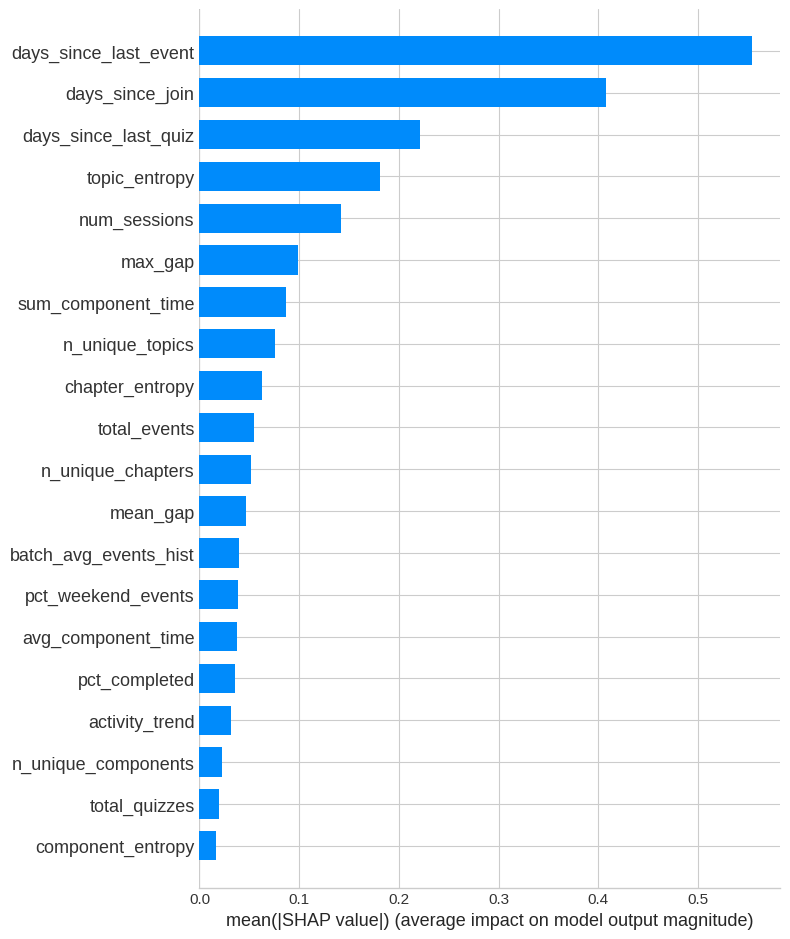

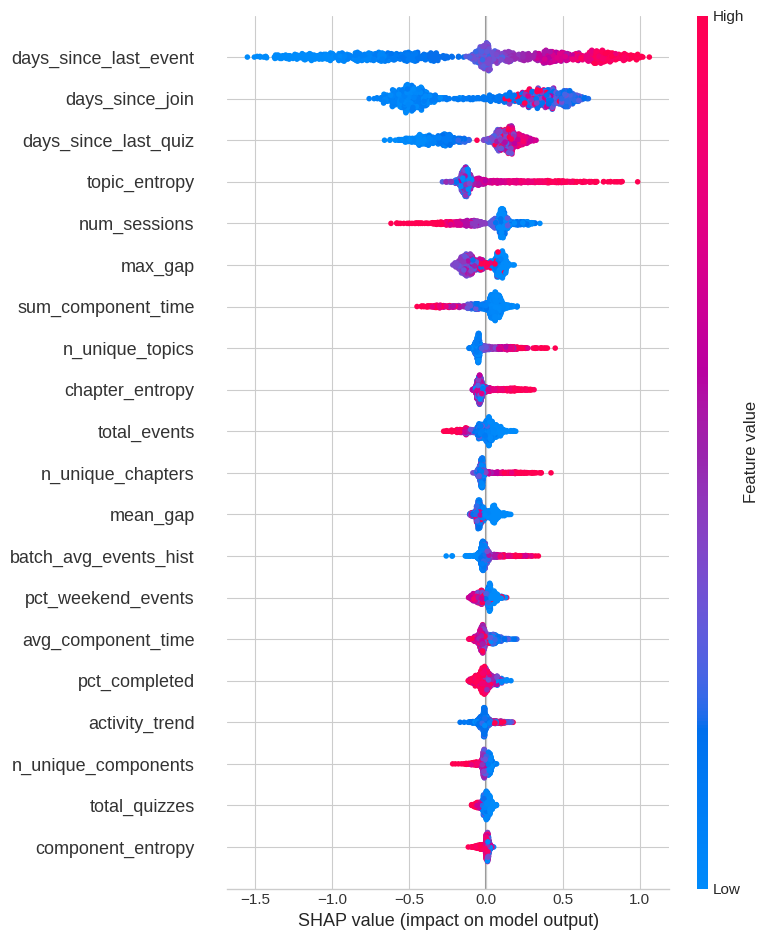

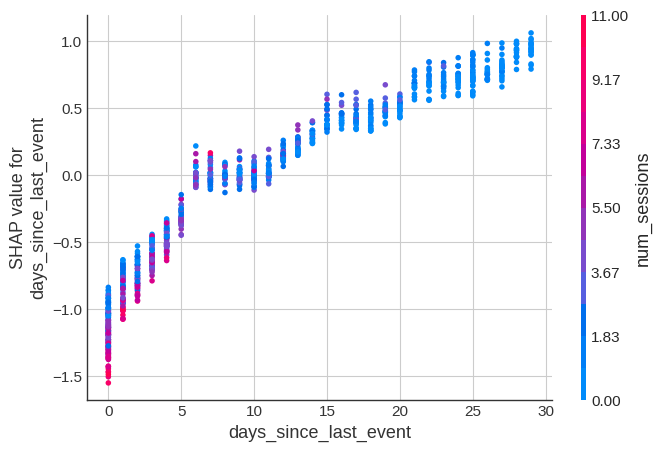

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. Creating a SHAP explainer for your tuned LightGBM model
explainer = shap.TreeExplainer(best_model)

# 2. Computing SHAP values on a sample of your test set
sample = X_test.sample(1000, random_state=42)
shap_values = explainer.shap_values(sample)

# 3. Global feature importance (mean absolute SHAP)
shap.summary_plot(shap_values, sample, plot_type="bar")

# 4. Detailing summary (beeswarm)
shap.summary_plot(shap_values, sample)

# 5. Partial dependence for a single feature
shap.dependence_plot("days_since_last_event", shap_values, sample)
